In [328]:
#question1
import pandas as pd
df = pd.read_csv(r'fsp_case_31_BSD.csv',index_col=0,header=[0,1])

In [329]:
df["ret"].head()

cmp_id,G_AALLN,G_ABIBB,G_ACFP,G_ADENVX,G_ADLERR,G_ADNA,G_AFFP,G_AIFP,G_AIRFP,G_AKZANA,...,G_TUIGR,G_UNANA,G_UPMFH,G_VIEFP,G_VIVFP,G_VLVY,G_VOD,G_VW,G_WKLNA,G_WPPLN
2017-01-02,0.000000,0.005470,0.008044,0.000000,-0.008627,0.002247,-0.003672,-0.002366,-0.000318,0.005388,...,0.028915,0.003451,0.005998,0.010820,0.002216,0.001880,0.000000,0.030347,0.010604,0.000000
2017-01-03,0.001724,-0.008902,0.024360,0.013504,-0.005221,-0.005728,0.003686,0.002372,0.010824,0.004522,...,-0.003285,-0.006752,0.004685,-0.011927,0.000829,0.005629,0.012760,0.020227,-0.006468,0.004956
2017-01-04,-0.016781,0.002495,0.022686,0.028127,0.010847,-0.005261,0.012176,-0.000946,-0.001575,0.004502,...,0.001099,0.001539,-0.008478,-0.003404,0.005522,0.004664,0.016304,-0.011826,-0.004051,-0.007124
2017-01-05,0.002188,0.005973,0.015369,0.000000,0.001385,-0.010073,0.014703,0.000474,0.018928,-0.004149,...,0.003658,0.001409,0.002993,-0.018945,0.001647,-0.001857,0.018230,0.008448,0.013219,0.009934
2017-01-06,-0.008734,-0.005443,-0.002764,-0.000720,0.019357,-0.002035,-0.007339,0.004261,0.008359,-0.003333,...,-0.008382,-0.004348,0.000000,-0.010130,0.004934,0.000000,0.009071,-0.004537,-0.003584,0.005464


In [540]:
market_daily_return = df[['ret']].fillna(0).mean(axis=1).to_frame()
market_daily_return.columns = ['Mean Market Return']
market_daily_return.index = pd.to_datetime(market_daily_return.index, format='%Y-%m-%d')

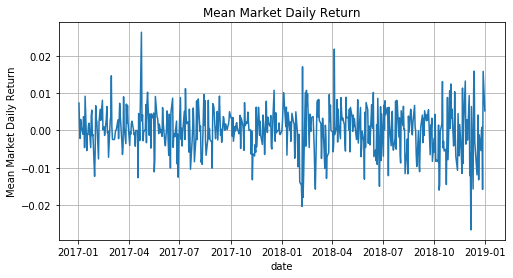

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(market_daily_return)
plt.xlabel('date')
plt.ylabel('Mean Market Daily Return')
plt.title('Mean Market Daily Return')
plt.grid()

plt.savefig("images//daily_return")

In [49]:
#question2
np_array = df.values
len(np_array)

521

In [335]:
r_e = df['ret'].fillna(0)
r_e.columns = r_s.columns.tolist()
r_e.index = pd.to_datetime(r_s.index, format='%Y-%m-%d')
r_m = market_daily_return

In [322]:
def cal_beta(df):
    betas = []
    for index in range (22,len(df)+1):
        cov_matrix = df.iloc[(index-22):index].cov()
        if cov_matrix.iloc[0,0] == 0:
            betas.append(0)
        else:
            temp_beta = (cov_matrix.iloc[0,1])/(cov_matrix.iloc[1,1])
            betas.append(temp_beta)
          
    return betas

def cal_all_beta(df, r_m):
    all_betas = []
    for companies in df:
        all_betas.append(cal_beta(pd.concat([df[companies], r_m], axis = 1)))
    
    return pd.DataFrame(all_betas, index = df.columns, columns = df.index[21:]).transpose()

In [336]:
all_beta = cal_all_beta(r_e,r_m)
all_beta.head()

,G_AALLN,G_ABIBB,G_ACFP,G_ADENVX,G_ADLERR,G_ADNA,G_AFFP,G_AIFP,G_AIRFP,G_AKZANA,...,G_TUIGR,G_UNANA,G_UPMFH,G_VIEFP,G_VIVFP,G_VLVY,G_VOD,G_VW,G_WKLNA,G_WPPLN
2017-01-31,1.127264,0.763364,1.374530,0.564905,2.034429,1.031871,0.855562,1.108049,1.288724,0.838952,...,1.045082,0.706474,2.680481,0.076101,1.177498,0.865169,-0.134535,1.986867,0.416397,0.617918
2017-02-01,1.297491,0.764279,1.467157,0.716519,2.886204,1.063068,1.132501,1.204050,1.394055,0.906917,...,0.623758,0.698591,3.506507,-0.314819,1.289224,1.507989,-0.234288,1.697454,0.234741,0.572020
2017-02-02,1.264952,0.806781,1.394869,0.672405,2.792799,1.092794,1.085842,1.198218,1.325922,0.893849,...,0.611912,0.715358,3.622477,-0.227879,1.250454,1.526216,-0.239894,1.593927,0.333040,0.561349
2017-02-03,0.974182,0.869630,1.611331,0.778180,2.794082,1.102721,1.091095,1.234542,1.338750,0.899258,...,0.678183,0.783400,3.448097,-0.206273,1.294741,1.481393,-0.122438,1.542450,0.313940,0.539558
2017-02-06,1.040134,0.805303,1.598993,0.735246,2.579543,1.189392,0.918542,1.274840,1.089120,1.039039,...,0.653369,0.705084,3.173059,0.029468,1.128452,1.423833,-0.179251,1.749009,0.236248,0.560035


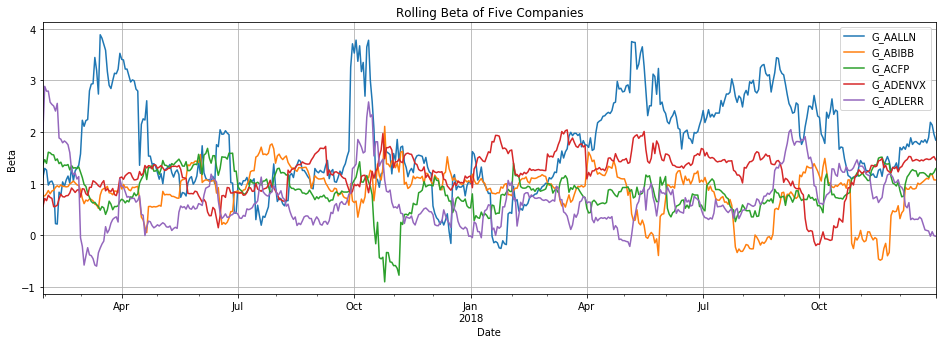

In [551]:
ax = all_beta.iloc[:,0:5].plot(figsize=(16,5))
ax.grid()
ax.set_title("Rolling Beta of Five Companies")
ax.set_ylabel("Beta")
ax.set_xlabel("Date")

plt.savefig("images//rolling_beta")

In [330]:
def get_info(beta_matrix):
    ind = []
    beta_list = []
    for column in beta_matrix.columns:
        more_volatile = beta_matrix[beta_matrix[column] > 1][column].dropna().shape[0]
        less_volatile = beta_matrix[beta_matrix[column] < 1][column].dropna().shape[0]
        uncorrelated = beta_matrix[beta_matrix[column] == 0][column].dropna().shape[0]
        neg_correlated = beta_matrix[beta_matrix[column] < 0][column].dropna().shape[0]
        beta_list.append([more_volatile, less_volatile, uncorrelated, neg_correlated])
        ind.append(column)
        
    return pd.DataFrame(beta_list, columns=['More Volatile', 'Less Volatile', 'Uncorrelated', 'Negatively Correlated'], index=ind)

In [337]:
summary = get_info(all_beta)
summary.head()

,More Volatile,Less Volatile,Uncorrelated,Negatively Correlated
G_AALLN,410,90,0,10
G_ABIBB,211,289,0,44
G_ACFP,173,327,0,13
G_ADENVX,358,142,0,10
G_ADLERR,101,399,0,29


In [338]:
summary.describe()

,More Volatile,Less Volatile,Uncorrelated,Negatively Correlated
count,157.000000,157.000000,157.000000,157.000000
mean,242.496815,257.503185,24.808917,26.146497
std,129.163861,129.163861,93.889060,30.844485
min,0.000000,17.000000,0.000000,0.000000
25%,136.000000,148.000000,0.000000,4.000000
50%,243.000000,257.000000,0.000000,15.000000
75%,352.000000,364.000000,0.000000,37.000000
max,483.000000,500.000000,478.000000,186.000000


In [395]:
def cal_mcap(df):
    sum_mcap = df['mcap'].ffill().sum(axis=1)
    element = df['mcap'].ffill().multiply(df['ret'])
    element = element.div(sum_mcap, axis = 0)
    answer = element.sum(axis = 1)
    
    return answer

In [399]:
mcap = cal_mcap(df)

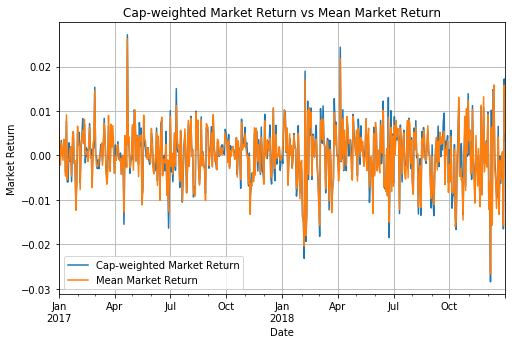

In [552]:
both_return = pd.concat([cap_weighted_market_return, market_daily_return], axis = 1)
ax = both_return.plot(title='Cap-weighted Market Return vs Mean Market Return', figsize=(8,5))
ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Market Return")

plt.savefig("images//market_return")

In [406]:
all_beta_m = cal_all_beta(r_e,mcap)

In [409]:
all_beta_m.head()

,G_AALLN,G_ABIBB,G_ACFP,G_ADENVX,G_ADLERR,G_ADNA,G_AFFP,G_AIFP,G_AIRFP,G_AKZANA,...,G_TUIGR,G_UNANA,G_UPMFH,G_VIEFP,G_VIVFP,G_VLVY,G_VOD,G_VW,G_WKLNA,G_WPPLN
2017-01-31,1.214037,0.824742,1.450022,0.655882,1.838878,0.704193,0.816950,1.119753,1.168134,1.170933,...,1.165808,0.917540,2.902459,-0.269434,1.218339,0.870472,0.230634,2.025130,0.597369,0.789416
2017-02-01,1.355596,0.822763,1.524991,0.788412,2.592312,0.721398,1.060605,1.197008,1.250784,1.229461,...,0.786924,0.908363,3.638385,-0.623896,1.312120,1.448854,0.144774,1.756277,0.434074,0.742819
2017-02-02,1.330693,0.871798,1.441466,0.738175,2.515414,0.762830,1.014791,1.191903,1.181535,1.213633,...,0.776817,0.927829,3.759493,-0.526915,1.274745,1.471861,0.123284,1.644912,0.535607,0.728535
2017-02-03,0.792225,0.931705,1.648001,0.622533,2.193944,0.809245,0.766203,1.193241,1.152769,1.124112,...,0.886525,1.008122,3.141241,-0.407546,1.196303,1.250861,0.183844,1.579650,0.527968,0.724840
2017-02-06,0.906338,0.884175,1.652831,0.623932,2.129490,0.967020,0.618007,1.265506,0.939106,1.285441,...,0.870499,0.952457,3.031006,-0.152436,1.092037,1.283710,0.054352,1.788388,0.430158,0.725597


In [420]:
#question 5a
b_s_i = df['mcap'].ffill().rolling(22).mean().apply(np.log).fillna(0).iloc[21:, :]
b_s_i.head()

cmp_id,G_AALLN,G_ABIBB,G_ACFP,G_ADENVX,G_ADLERR,G_ADNA,G_AFFP,G_AIFP,G_AIRFP,G_AKZANA,...,G_TUIGR,G_UNANA,G_UPMFH,G_VIEFP,G_VIVFP,G_VLVY,G_VOD,G_VW,G_WKLNA,G_WPPLN
2017-01-31,23.821694,25.908596,23.165580,23.201489,20.383009,24.019040,21.205529,24.481592,24.697010,23.523699,...,22.843269,24.886761,23.317449,22.963059,23.916570,23.723888,24.930809,24.568402,23.140268,24.102103
2017-02-01,23.830316,25.907454,23.169207,23.205443,20.383465,24.019225,21.204779,24.480253,24.698089,23.527323,...,22.843646,24.885580,23.316106,22.961463,23.914922,23.729970,24.930294,24.571750,23.141813,24.103649
2017-02-02,23.838943,25.907858,23.172720,23.209513,20.384651,24.020844,21.204563,24.479782,24.699391,23.531796,...,22.845025,24.885669,23.316718,22.961733,23.913945,23.736996,24.929279,24.574887,23.145262,24.105048
2017-02-03,23.846293,25.908081,23.176121,23.211930,20.384197,24.022601,21.202515,24.479081,24.700461,23.535673,...,22.846515,24.885698,23.315680,22.961962,23.912140,23.742902,24.927439,24.578272,23.148593,24.106639
2017-02-06,23.852801,25.907040,23.177469,23.213650,20.382642,24.023664,21.198760,24.476964,24.700001,23.538479,...,22.846886,24.884828,23.313464,22.961889,23.909426,23.747973,24.923804,24.579403,23.150635,24.106761


In [419]:
r_i = df['ret'].fillna(0).rolling(22).mean().dropna()
r_i.head()

cmp_id,G_AALLN,G_ABIBB,G_ACFP,G_ADENVX,G_ADLERR,G_ADNA,G_AFFP,G_AIFP,G_AIRFP,G_AKZANA,...,G_TUIGR,G_UNANA,G_UPMFH,G_VIEFP,G_VIVFP,G_VLVY,G_VOD,G_VW,G_WKLNA,G_WPPLN
2017-01-31,0.007501,-0.002016,0.002651,0.002538,-0.002919,-0.000645,-0.002410,-0.002466,-0.000018,0.002577,...,0.000905,-0.001989,-0.004389,-0.001164,-0.002830,0.002289,-0.001179,0.003647,0.001276,0.000730
2017-02-01,0.007953,-0.002028,0.002891,0.002990,-0.000262,-0.000597,-0.001556,-0.002222,0.000243,0.002759,...,-0.000426,-0.002036,-0.001783,-0.002406,-0.002515,0.004358,-0.001494,0.002683,0.000691,0.000533
2017-02-02,0.008074,-0.001388,0.001837,0.002409,-0.000440,-0.000072,-0.001934,-0.002261,-0.000437,0.002718,...,-0.000344,-0.001668,-0.000673,-0.001483,-0.002752,0.004646,-0.002027,0.001550,0.001694,0.000382
2017-02-03,0.007335,-0.001099,0.002114,0.001002,-0.001594,0.000533,-0.003296,-0.002015,-0.000206,0.002585,...,0.000228,-0.001254,-0.001870,-0.001051,-0.003110,0.004127,-0.002557,0.002287,0.002050,0.000878
2017-02-06,0.007150,-0.001612,0.000800,0.000970,-0.001936,0.000593,-0.004226,-0.002690,-0.001030,0.002281,...,-0.000121,-0.001408,-0.002334,-0.000610,-0.003265,0.004250,-0.003678,0.000728,0.001487,0.000057


In [556]:
summary_m = get_info(all_beta_m)
summary_m

,More Volatile,Less Volatile,Uncorrelated,Negatively Correlated
G_AALLN,367,133,0,13
G_ABIBB,242,258,0,20
G_ACFP,137,363,0,13
G_ADENVX,310,190,0,3
G_ADLERR,103,397,0,44
...,...,...,...,...
G_VLVY,361,139,0,0
G_VOD,253,247,0,10
G_VW,359,141,0,12
G_WKLNA,146,354,0,25


In [558]:
summary_m.describe()

,More Volatile,Less Volatile,Uncorrelated,Negatively Correlated
count,157.000000,157.000000,157.000000,157.000000
mean,224.993631,275.006369,24.808917,29.070064
std,120.699537,120.699537,93.889060,35.914449
min,0.000000,44.000000,0.000000,0.000000
25%,117.000000,188.000000,0.000000,6.000000
50%,226.000000,274.000000,0.000000,17.000000
75%,312.000000,383.000000,0.000000,37.000000
max,456.000000,500.000000,478.000000,234.000000


In [421]:
b_m_i = all_beta_m

In [442]:
def apt_reg(r_i, b_m_i, b_s_i):
    from sklearn.linear_model import LinearRegression
    R_s = []
    R_m= []
    a = []
    
    for index in range(0,len(r_i)):
        reg = LinearRegression()
        temp_ri = r_i.iloc[index]
        temp_bm = b_m_i.iloc[index]
        temp_bsi = b_s_i.iloc[index]
        combined = pd.concat([temp_bm, temp_bsi], axis=1)
        combined.columns = ['b_m', 'b_s_i']
        reg.fit(combined, temp_ri)
        predicted = reg.predict(combined)
        R_m.append(reg.coef_[0])
        R_s.append(reg.coef_[1])
        a.append(reg.intercept_)
        
    return pd.DataFrame([R_m, R_s, a], index = ["R_m", "R_s", "a"], columns = r_i.index).transpose()

In [443]:
regressed = apt_reg(r_i, b_m_i, b_s_i)

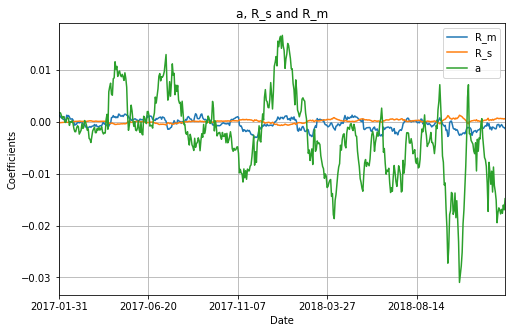

In [554]:
ax = regressed.plot(figsize =(8,5))
ax.set_ylabel("Coefficients")
ax.set_title("a, R_s and R_m")
ax.set_xlabel("Date")
ax.grid()

plt.savefig("images//regressed")

In [498]:
#question 5c
def cal_error(r_i, regressed, b_s, b_m):
    a = b_s.multiply(regressed["R_s"], axis = 0)
    b = b_m.multiply(regressed["R_m"], axis = 0)
    all_error = r_i - a - b
    all_error = all_error.subtract(regressed["a"], axis = 0)
    return all_error

all_error = cal_error(r_i, regressed, b_s_i, all_beta_m)

In [506]:
corr_e_r = r_i.corrwith(all_error, axis=0)
corr_e_r

cmp_id
G_AALLN     0.922100
G_ABIBB     0.927952
G_ACFP      0.930458
G_ADENVX    0.893420
G_ADLERR    0.963189
              ...   
G_VLVY      0.915369
G_VOD       0.945002
G_VW        0.900460
G_WKLNA     0.911745
G_WPPLN     0.947146
Length: 157, dtype: float64

In [512]:
#question 5d
R_matrix = pd.concat([regressed["R_m"], regressed["R_s"]], axis = 1)
cov_R = R_matrix.rolling(22).mean().dropna().cov()
cov_R

,R_m,R_s
R_m,6.350191e-07,-1.271291e-07
R_s,-1.271291e-07,7.465433e-08


In [560]:
np.linalg.norm(cov_R)

6.641883618076104e-07

In [513]:
#question 5e
from sklearn.decomposition import PCA

In [523]:
error_cov = all_error.cov()
pca = PCA()
error_cov_pca = pca.fit(error_cov)
eigenvectors = error_cov_pca.components_
eigenvalues = pca.singular_values_

In [524]:
eigenvalues

array([1.67651504e-04, 1.57909742e-04, 1.29197717e-04, 9.12673521e-05,
       8.08926686e-05, 6.89011492e-05, 6.10170406e-05, 5.33347273e-05,
       5.11094666e-05, 4.71183381e-05, 4.08478511e-05, 3.64617125e-05,
       3.55842070e-05, 2.97038503e-05, 2.84326346e-05, 2.64435905e-05,
       2.47891153e-05, 2.43680638e-05, 2.01233351e-05, 1.98757248e-05,
       1.80450007e-05, 1.59244233e-05, 1.45416441e-05, 1.27032986e-05,
       1.24124997e-05, 1.11022777e-05, 9.95475775e-06, 9.46020245e-06,
       8.24299944e-06, 7.03935435e-06, 6.80336432e-06, 5.90668084e-06,
       4.78241703e-06, 4.65922533e-06, 4.32908953e-06, 4.00632236e-06,
       3.67341131e-06, 3.62805478e-06, 3.33085284e-06, 3.24548936e-06,
       3.09435173e-06, 2.91650250e-06, 2.63630495e-06, 2.40353856e-06,
       2.37032392e-06, 2.27402963e-06, 2.04833891e-06, 2.01860461e-06,
       1.94011473e-06, 1.81693563e-06, 1.68023153e-06, 1.66091734e-06,
       1.60590969e-06, 1.57802357e-06, 1.43242067e-06, 1.38119974e-06,
      